In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.wcs import WCS
import numpy as np
import os
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from matplotlib.animation import FuncAnimation

In [2]:
base_dir = "/Users/robertstein/ztfimages/543/"
path = os.path.join(base_dir, "ztf_20191002147454_000543_zr_c14_o_q4_sciimg.fits")

In [3]:
from astropy.io import fits
fits.info(path)

Filename: /Users/robertstein/ztfimages/543/ztf_20191002147454_000543_zr_c14_o_q4_sciimg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  4             1 PrimaryHDU     268   (3072, 3080)   float32   


In [4]:
image_data = fits.getdata(path, ext=0)
print(fits.getheader(path, ext=0))

SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32                                                  NAXIS   =                    2                                                  NAXIS1  =                 3072                                                  NAXIS2  =                 3080                                                  BUNIT   = 'Data Value'                                                          ORIGIN  = 'Zwicky Transient Facility' / Data origin                             OBSERVER= 'ZTF Robotic Observing Software' / Observer                           ROBOSOFT= '0.99.5  June 17, 2019' / Robotic software version                    FITSSOFT= '0.99.5  June 17, 2019' / FITS software version                       INSTRUME= 'ZTF/MOSAIC'         / Instrument name                                DETECTOR= '        '           / Detector controller                            DETSOFT = '        '           / Detecto

Frames 300 37.5


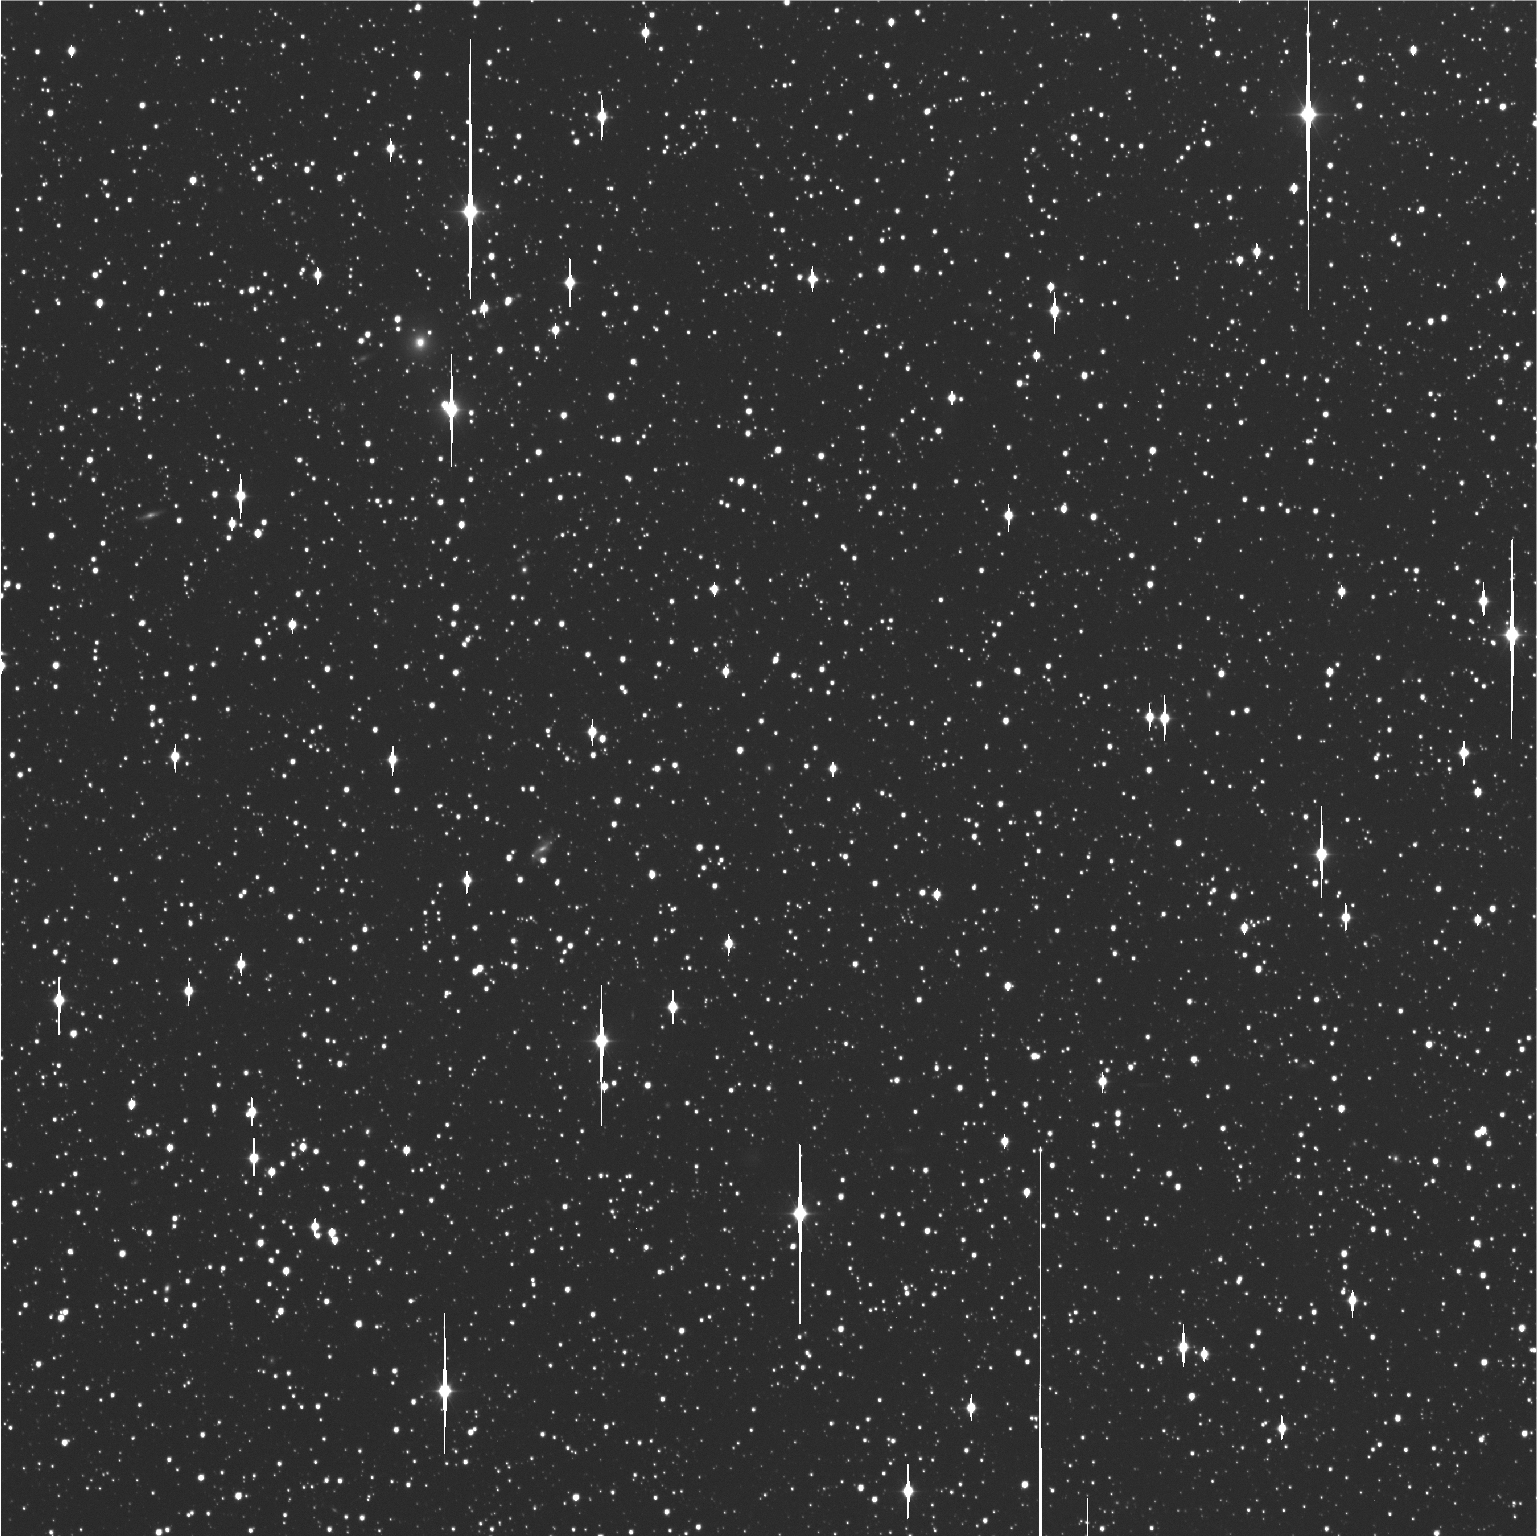

In [5]:
frames = 300

width = 3080.

dpi = 5.

hdu = fits.open(path)[0]
wcs = WCS(hdu.header)

lon, lat = wcs.all_world2pix(314.262416, 14.204515, 0)

width = 3072./2.

scale = frames/8

print("Frames", frames, scale)

def get_range(n_zoom):
    
    width_n = width * 2 ** -(n_zoom/scale)
        
    return (lon-width_n, lon+width_n), (lat-width_n, lat+width_n)

plt.figure(figsize=(width/dpi, width/dpi), dpi=dpi)

ax = plt.subplot(projection=wcs)

ax.imshow(np.log10(hdu.data), vmin=3.1, vmax=3.7, cmap='binary_r')
ax.grid(color='white', ls='solid')

ax.set_ylabel('Declination', color="white")
ax.set_xlabel('Right Ascension', color="white")

    # ax.invert_yaxis()
ax.tick_params(axis='both', which='major', labelsize=12, colors="white")

xlim, ylim = get_range(1.)
plt.xlim(xlim)
plt.ylim(ylim)
# xlim = 



def update_plot(j):
    
    if j < 0.75*frames:

        xlim, ylim = get_range(j+1)
        plt.xlim(xlim)
        plt.ylim(ylim)
        
    elif j < 0.8*frames:
        ax.set_ylabel('Declination', fontsize=big_fontsize)
        ax.set_xlabel('Right Ascension', fontsize=big_fontsize)
        ax.tick_params(axis='both', which='major', labelsize=12, colors="black")
        plt.scatter(lon, lat, s=5000, facecolors='none', edgecolors='white', alpha=0.2)
        
    else:
        plt.annotate("AT2019dsg", (lon+7, lat+7), color="white", alpha=0.2)  
        
update_plot(6)

plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.savefig("filename.pdf", bbox_inches = 'tight',
    pad_inches = 0)

plt.savefig("plots/AT2019dsg_image.jpg", dpi=dpi)

#ani = FuncAnimation(fig, update_plot, frames=frames,
#                    blit=False, interval=30)
#ani.save("plots/zoom_through_images.mp4")